In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv('csv/book_info_complete.csv')
df.head()

,title,description,plot,csm_review,need_to_know,par_rating,kids_rating,csm_rating,Author,Genre,...,Publisher's recommended age(s),Number of pages,Available on,Last updated,Illustrator,Authors,Awards,Publishers,Award,Illustrators
0,The Third Twin,Gripping thriller skimps on character developm...,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","THE THIRD TWIN has an interesting, compelling ...",Parents need to know that The Third Twin is a ...,17.0,14.0,12,CJ Omololu,Mystery,...,12 - 18,336.0,"Nook, Hardback, iBooks, Kindle","June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
1,Small Damages,Luminous story of pregnant teen's summer in Sp...,"It's the summer of 1996, which 18-year-old Ken...",This could well have been a minefield of clich...,Parents need to know that Small Damages is nar...,NaN,14.0,14,Beth Kephart,Coming of Age,...,14 - 17,304.0,"Nook, Hardback, iBooks, Kindle","May 06, 2019",NaN,NaN,NaN,NaN,NaN,NaN
2,"The School for Good and Evil, Book 1",Fractured fairy tale has plenty of twists for ...,When best friends Sophie and Agatha are stolen...,The School for Good and Evil is no run-of-the-...,Parents need to know that The School for Good ...,11.0,11.0,8,Soman Chainani,Fairy Tale,...,8 - 17,496.0,"Nook, Audiobook (unabridged), Hardback, iBooks...","October 18, 2017",Iacopo Bruno,NaN,NaN,NaN,NaN,NaN
3,"Agent of Chaos: The X-Files Origins, Book 1","Series pictures Mulder as teen, captures essen...","Set in 1979, AGENT OF CHAOS follows a 17-year-...",Popular TV characters don't always make a smoo...,Parents need to know that Agent of Chaos: The ...,NaN,NaN,13,Kami Garcia,Science Fiction,...,14 - 18,320.0,"Nook, Audiobook (abridged), Hardback, iBooks, ...","June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
4,Crossing Ebenezer Creek,Heartbreaking novel follows freed slaves on Sh...,CROSSING EBENEZER CREEK is a YA novel from awa...,"Beautifully written and poetically rendered, t...",Parents need to know that Crossing Ebenezer Cr...,NaN,NaN,13,Tonya Bolden,Historical Fiction,...,NaN,240.0,"Nook, Audiobook (unabridged), Hardback, Kindle","January 18, 2019",NaN,NaN,NaN,NaN,NaN,NaN


## Create train/test split

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

In [4]:
for train_index, test_index in split.split(df, df['csm_rating']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [5]:
test_set['csm_rating'].value_counts() / len(test_set)

4     0.135739
14    0.109966
9     0.107388
8     0.103093
13    0.096220
10    0.096220
12    0.086770
3     0.048110
15    0.037801
6     0.037801
11    0.034364
5     0.034364
7     0.029210
2     0.024914
16    0.015464
17    0.002577
Name: csm_rating, dtype: float64

In [6]:
train_set['csm_rating'].value_counts() / len(train_set)

4     0.135426
14    0.109845
9     0.107051
8     0.103181
10    0.096518
13    0.096518
12    0.086414
3     0.048581
15    0.037833
6     0.037618
5     0.034179
11    0.033964
7     0.029020
2     0.025365
16    0.015262
17    0.003224
Name: csm_rating, dtype: float64

In [7]:
train_set.head()

,title,description,plot,csm_review,need_to_know,par_rating,kids_rating,csm_rating,Author,Genre,...,Publisher's recommended age(s),Number of pages,Available on,Last updated,Illustrator,Authors,Awards,Publishers,Award,Illustrators
5779,"Bloodhound: Beka Cooper, Book 2",Second book in fantasy series is more mature t...,"BLOODHOUND finds young policewoman -- aka ""Dog...","Like its predecessor, Terrier, Bloodhound is m...",Parents need to know that this fantasy/crime s...,13.0,12.0,12,Tamora Pierce,Fantasy,...,12 - 17,550.0,NaN,"June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
2,"The School for Good and Evil, Book 1",Fractured fairy tale has plenty of twists for ...,When best friends Sophie and Agatha are stolen...,The School for Good and Evil is no run-of-the-...,Parents need to know that The School for Good ...,11.0,11.0,8,Soman Chainani,Fairy Tale,...,8 - 17,496.0,"Nook, Audiobook (unabridged), Hardback, iBooks...","October 18, 2017",Iacopo Bruno,NaN,NaN,NaN,NaN,NaN
3437,"Twilight: The Twilight Saga, Book 1",Overlong but engrossing popular vampire romance.,"When her mother gets remarried, Bella Swan mov...",This incredibly long book is really two books....,"Parents need to know that, while very mild by ...",13.0,11.0,13,Stephenie Meyer,Fantasy,...,12,498.0,NaN,"February 07, 2020",NaN,NaN,NaN,NaN,NaN,NaN
1312,The Lost Girl,"Engrossing story of an ""echo"" designed to repl...","Eva, a teen living in England, has human-like ...",Sangu Mandanna's debut novel is inspired by Fr...,Parents need to know that The Lost Girl is the...,13.0,12.0,14,Sangu Mandanna,Science Fiction,...,13 - 18,432.0,"Nook, Hardback, iBooks, Kindle","June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
5291,"Warcross, Book 1",Winning teen girl drives cyberpunk virtual rea...,"As WARCROSS opens, bounty hunter Emika Chen fi...","Cyberpunk fell out of favor for a while, but t...",Parents need to know that Warcross is the firs...,14.0,13.0,13,Marie Lu,Science Fiction,...,NaN,368.0,"Nook, Audiobook (unabridged), Hardback, iBooks...","December 05, 2019",NaN,NaN,NaN,NaN,NaN,NaN


## Save Train and Test Sets

In [8]:
train_set.to_csv('csv/train.csv', index=True, index_label="index", float_format = '%.12g')
test_set.to_csv('csv/test.csv', index=True, index_label="index", float_format= '%.12g')

## EDA

/home/evan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/evan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


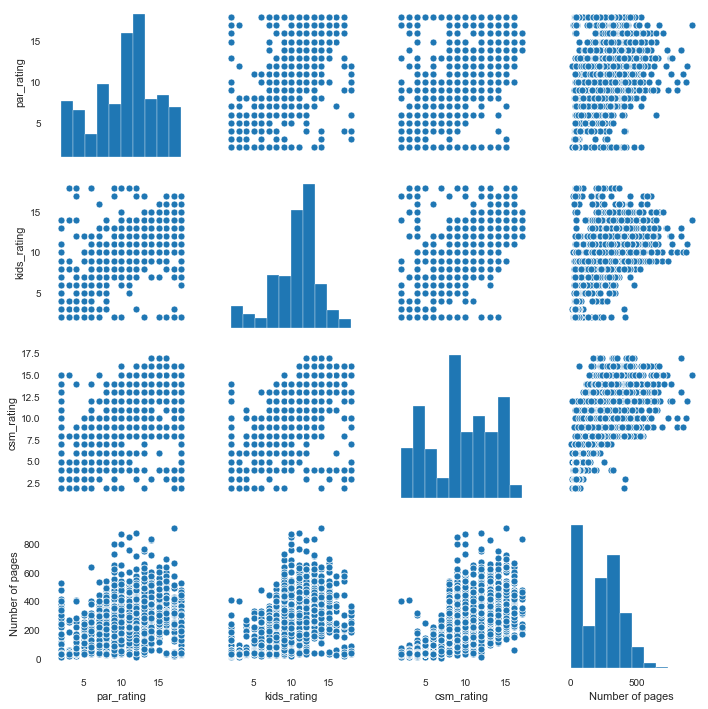

In [9]:
sns.pairplot(train_set);

In [10]:
profile = ProfileReport(train_set, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [11]:
!mkdir reports

mkdir: cannot create directory ‘reports’: File exists


In [12]:
profile.to_file(output_file="reports/train_eda.html")

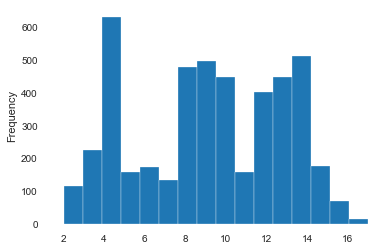

In [10]:
train_set["csm_rating"].plot(kind="hist", bins = 16);

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 5779 to 2696
Data columns (total 24 columns):
title                             4652 non-null object
description                       4652 non-null object
plot                              4652 non-null object
csm_review                        4652 non-null object
need_to_know                      4652 non-null object
par_rating                        1988 non-null float64
kids_rating                       2414 non-null float64
csm_rating                        4652 non-null int64
Author                            4377 non-null object
Genre                             4652 non-null object
Topics                            3112 non-null object
Book type                         4652 non-null object
Publisher                         4546 non-null object
Publication date                  4652 non-null object
Publisher's recommended age(s)    3726 non-null object
Number of pages                   4616 non-null float64
Availabl

In [12]:
train_set[["pub_min_age", "pub_max_age"]] = train_set["Publisher\'s recommended age(s)"].str.split("-", expand=True)

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 5779 to 2696
Data columns (total 26 columns):
title                             4652 non-null object
description                       4652 non-null object
plot                              4652 non-null object
csm_review                        4652 non-null object
need_to_know                      4652 non-null object
par_rating                        1988 non-null float64
kids_rating                       2414 non-null float64
csm_rating                        4652 non-null int64
Author                            4377 non-null object
Genre                             4652 non-null object
Topics                            3112 non-null object
Book type                         4652 non-null object
Publisher                         4546 non-null object
Publication date                  4652 non-null object
Publisher's recommended age(s)    3726 non-null object
Number of pages                   4616 non-null float64
Availabl

In [85]:
train_set.drop(columns=["Publisher\'s recommended age(s)", "Last updated", "Award", "Awards"], inplace=True)

In [91]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 5779 to 2696
Data columns (total 22 columns):
title               4652 non-null object
description         4652 non-null object
plot                4652 non-null object
csm_review          4652 non-null object
need_to_know        4652 non-null object
par_rating          1988 non-null float64
kids_rating         2414 non-null float64
csm_rating          4652 non-null int64
Author              4377 non-null object
Genre               4652 non-null object
Topics              3112 non-null object
Book type           4652 non-null object
Publisher           4546 non-null object
Publication date    4652 non-null object
Number of pages     4616 non-null float64
Available on        2853 non-null object
Illustrator         2008 non-null object
Authors             275 non-null object
Publishers          26 non-null object
Illustrators        46 non-null object
pub_min_age         3726 non-null object
pub_max_age         3582 non-nul

In [99]:
train_set["pub_max_age"]

5779      17
2         17
3437    None
1312      18
5291     NaN
        ... 
4259    None
5147     NaN
3419       7
400       12
2696       8
Name: pub_max_age, Length: 4652, dtype: object

In [12]:
train_set.groupby(["csm_rating"]).mean().round().reset_index()

,csm_rating,par_rating,kids_rating,Number of pages
0,2,5.0,4.0,34.0
1,3,6.0,9.0,41.0
2,4,5.0,5.0,41.0
3,5,6.0,7.0,45.0
4,6,7.0,6.0,79.0
5,7,7.0,7.0,121.0
6,8,9.0,8.0,241.0
7,9,10.0,9.0,264.0
8,10,11.0,10.0,296.0
9,11,11.0,11.0,284.0


In [13]:
train_base = train_set.dropna(axis='columns')

In [16]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4652 entries, 5779 to 2696
Data columns (total 10 columns):
title               4652 non-null object
description         4652 non-null object
plot                4652 non-null object
csm_review          4652 non-null object
need_to_know        4652 non-null object
csm_rating          4652 non-null int64
Genre               4652 non-null object
Book type           4652 non-null object
Publication date    4652 non-null object
Last updated        4652 non-null object
dtypes: int64(1), object(9)
memory usage: 559.8+ KB


In [ ]:
train.